In [9]:
import pandas as pd
from typing import List

import numpy as np
from numpy import trapezoid

In [2]:
results = pd.read_csv('results/Chinatown/cnn_alpha_complexity_loyalty.csv')


In [3]:
only_os = results[results["Type"] == "OS"]

In [4]:
only_os.head(5)

,Type,Alpha,Percentage Agreement,Kappa Loyalty,Complexity,Num Segments
0,OS,0.00,71,0.000000,0.041667,1.00
5,OS,0.01,30,0.008218,0.083333,2.00
10,OS,0.02,30,0.008218,0.083333,2.00
15,OS,0.03,30,0.008218,0.087917,2.11
20,OS,0.04,39,0.086826,0.128333,3.08


In [63]:
import numpy as np

def scaled_auc(complexity: list | np.ndarray, loyalty: list | np.ndarray) -> float:
    """
    Computes AUC under the (complexity, loyalty) curve, then scales it to [0, 1].

    Parameters:
        complexity: List or array of x-values (should be sorted).
        loyalty: List or array of y-values.

    Returns:
        AUC scaled between 0 and 1.
    """
    complexity = np.array(complexity)
    loyalty = np.array(loyalty)

    # Ensure data is sorted by x-axis
    sorted_idx = np.argsort(complexity)
    complexity = complexity[sorted_idx]
    loyalty = loyalty[sorted_idx]

    # Compute raw AUC
    raw_auc = np.trapezoid(loyalty, complexity)
    #raw_auc = sum(loyalty)/len(complexity)

    # Compute max possible AUC (if loyalty was always 1)
    max_auc = (complexity[-1] - complexity[0]) * 1.0

    # Avoid division by zero in degenerate cases
    if max_auc == 0:
        return 0.0

    # Scale to [0, 1]
    scaled = raw_auc / max_auc
    return scaled

In [60]:
scaled_auc(only_os["Complexity"], only_os["Kappa Loyalty"])

np.float64(0.7781606884815516)

In [61]:
def get_auc_for_all_types(df : pd.DataFrame) -> List[float]:
    types = df["Type"].unique()
    for type in types:
        curr_rows = df[df["Type"] == type]
        curr_auc = scaled_auc(curr_rows["Complexity"], curr_rows["Kappa Loyalty"])
        print(type, curr_auc)


In [56]:
import matplotlib.pyplot as plt

def plot_percentage_agreement(df):
    plt.figure(figsize=(10, 6))

    for simp_type in df["Type"].unique():
        subset = df[df["Type"] == simp_type]
        plt.scatter(subset["Complexity"], subset["Kappa Loyalty"], label=simp_type, alpha=0.7)

    plt.title("Kappa Loyalty vs Complexity by Type")
    plt.xlabel("Complexity")
    plt.ylabel("Kappa Loyalty")
    plt.legend(title="Simplification Type")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

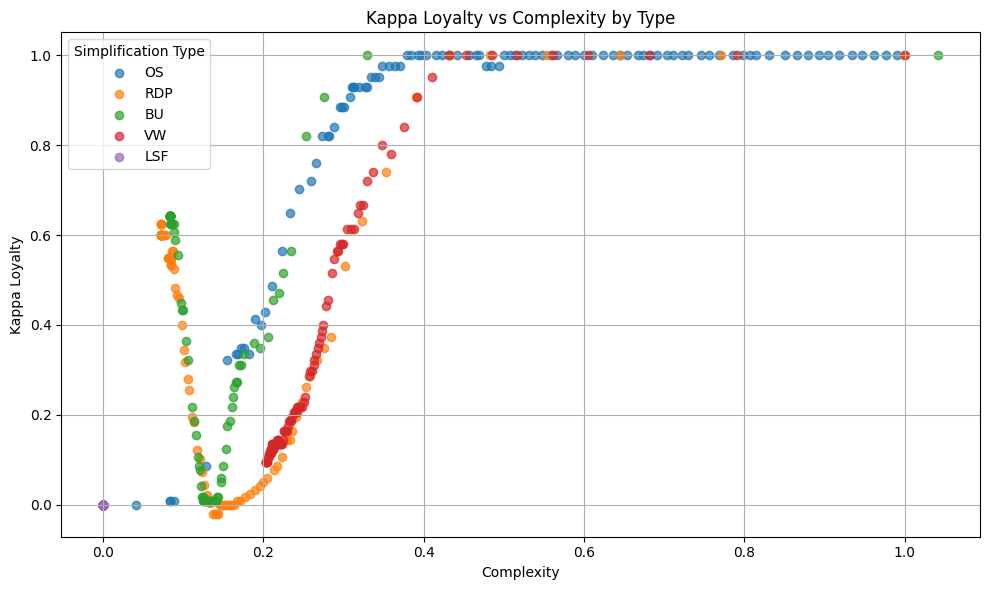

In [57]:
plot_percentage_agreement(results)

In [65]:
get_auc_for_all_types(results)


OS 0.8205560862722864
RDP 0.7720708125104347
BU 0.8778513796637242
VW 0.8842097533555981
LSF 0.0
